# Exercici 1
## Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings   #igonaré los warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/alpid/Downloads/housing data.csv", header = None)
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Como en el M5T02 ya hice el sanity check y el analisis descriptivo básico, no lo voy a repetir.

### Primero voy a dividir la muestra para crear el entorno de entrenamiento y el de test para mis modelos de regresion:

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Voy a normalizar los inputs al haber mucha disparidad de tamaño de numeros:

Nota: Esta vez no utilizaré el modo Robust (aunque es bueno cuando hay outliers), sino el StandardScaler (como me sugiere Laia), para practicar.

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Ahora procederé a crear varios modelos de regresión que me permitan predecir el precio de las viviendas:

## 1) Regresión Lineal:

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model1 = LinearRegression().fit(X_train_scaled, y_train)   # llamo a la instacia del modelo de regresion lineal y lo entreno con los inputs de las variables independientes para obtener los multiplicadores (b0, b1, etc) de la ecuaciónd e mi modelo

In [10]:
y_pred1 = model1.predict(X_test_scaled) # hacemos la predicción con las variables independientes del entorno test

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_lin = r2_score(y_test, y_pred1)   # evaluo el coeficiente de determinacion de R2 (se lo asigno a una variable para comprarlo en el ejercicio 2)
r2_lin

0.7599644039117446

## 2) Regresión polinómica:

2.1) grado 2:

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_scaled, y_train)  # degree=2 define el grado del polinomio, y include_bias=False dice que no fuerce a que el intercept sea cero, es decir, que el valor b0 de corte de la función con el eje Y sea 0

In [15]:
X_train_poly = poly.fit_transform(X_train_scaled)  # cambia la forma de los dtos de las variables idependientes para trabajar en regresion polinomial de orden mayor que 1,
                                                    # es decir, convierte de X=[1, x1, x2,...] a Z=[1, x1, x2, x1x2, x1^2, x2^2,...]
                                                   # creando un nuevo polinomio y= w0+w1z1+w2z2+w3z3... en el que haccemos la regresión lineal siendo las z cada X del transofrmado

In [16]:
from sklearn.linear_model import LinearRegression   #ya se que ya lo he solicitado antes pero es por seguir la lógica

In [17]:
poly_reg_model = LinearRegression().fit(X_train_poly, y_train)

In [18]:
X_test_poly = poly.transform(X_test_scaled)  #trasnformo las independientes del entorono test

In [19]:
y_pred12 = poly_reg_model.predict(X_test_poly)  #hago como en el modelo de regresion lienal pero las variables independientes ya correspodnen a una función polinómica

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_ploy2 = r2_score(y_test, y_pred12)
r2_ploy2

0.731415594361103

In [22]:
r2_score = poly_reg_model.score(X_test_poly, y_test)  #otra forma
print('R2 score on test set:', r2_score)

R2 score on test set: 0.731415594361103


Observamos que la regresión empeora

2.2) grado 3:

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X_train_scaled, y_train)  # degree=2 define el grado del polinomio, y include_bias=False dice que no fuerce a que el intercept sea cero, es decir, que el valor b0 de corte de la función con el eje Y sea 0

In [25]:
X_train_poly = poly.fit_transform(X_train_scaled)  # cambia la forma de los dtos de las variables idependientes para trabajar en regresion polinomial de orden mayor que 1

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
poly_reg_model = LinearRegression().fit(X_train_poly, y_train)

In [28]:
X_test_poly = poly.transform(X_test_scaled)  #trasnformo las independientes del entorono test

In [29]:
y_pred13 = poly_reg_model.predict(X_test_poly)  #hago como en el modelo de regresion lienal pero las variables independientes ya correspodnen a una función polinómica

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_poly3 = r2_score(y_test, y_pred13)
r2_poly3

-16.81259758805538

Claramente el modelo adecuado no es la regresión polinómica

## 3) Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model2 = RandomForestRegressor().fit(X_train_scaled, y_train)

In [34]:
y_pred2 = model2.predict(X_test_scaled)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_forest1 = r2_score(y_test, y_pred2)
r2_forest1

0.8696321486495171

Vemos que con el arbol de decisión Random Forest conseguimos resultados aceptables.

### 4) Gradient Boosting Trees

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
model3 = GradientBoostingRegressor().fit(X_train_scaled, y_train)

In [39]:
y_pred3 = model3.predict(X_test_scaled)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_forest2 = r2_score(y_test, y_pred3)
r2_forest2

0.8886358312096851

EL gradient Boosting Trees nos da los mejores resultados hasta ahora.

# Exercici 2
## Compara’ls en base al MSE i al R2.

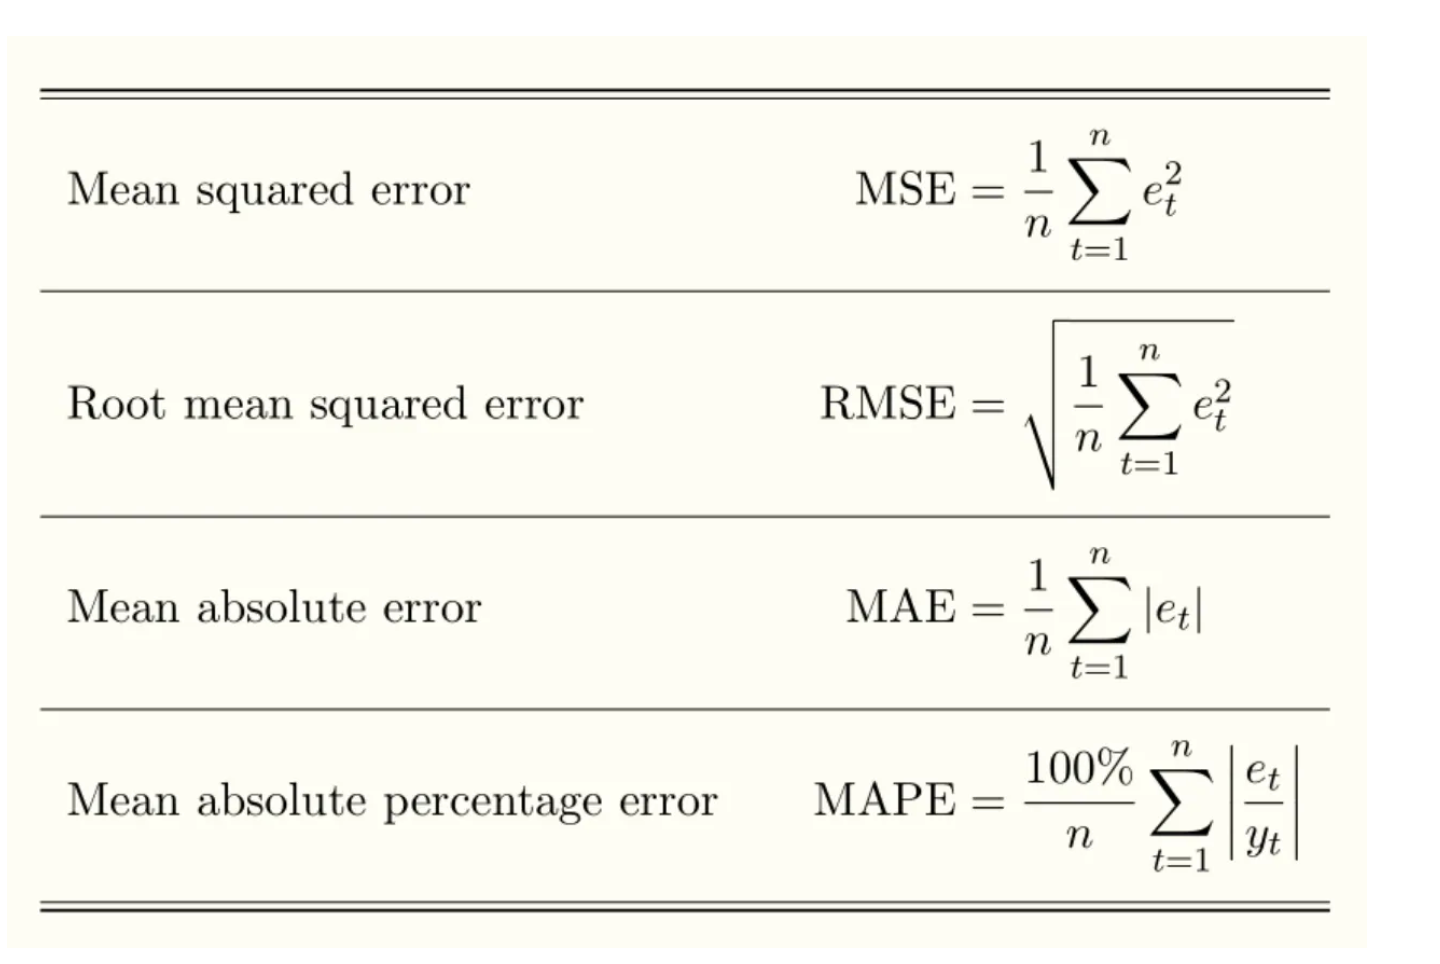

Recordemos que R2 score = 1-(error del modelo de regresion lineal/MSE de la media de todos los valores)

Como he calculado en cada caso el R2, voy a calculador el MSE (Mean Squared error) y compararlos:

In [42]:
from sklearn.metrics import mean_squared_error

1) Regresión lineal

In [43]:
r2_lin

0.7599644039117446

In [44]:
mean_squared_error(y_test, y_pred1)

21.13675739570808

Claramente el error MSE es menos preciso en este caso en la regresión Lineal.

2) Regresión Polinomila

2.1) Polinomio de grado 2

In [45]:
r2_ploy2

0.731415594361103

In [46]:
mean_squared_error(y_test, y_pred12)

23.650673128382657

2.2)Polinomio de grado 3

In [47]:
r2_poly3

-16.81259758805538

In [48]:
mean_squared_error(y_test, y_pred13)

1568.5196693396724

No solo observaos que MSE es menos preciso sino que se confirma en ambos casos que la regresion polinómica diverge.

3) Random Forest

In [49]:
r2_forest1

0.8696321486495171

In [50]:
mean_squared_error(y_test, y_pred2)

11.479770880239526

4) Gradient Boosting Trees

In [51]:
r2_forest2

0.8886358312096851

In [52]:
mean_squared_error(y_test, y_pred3)

9.806368124793062

Podemos comprobar que el modelo de Gradient Boost Trees regresor es mas acertado.

Observamos como el MSE se reduce cuando utilizamos modelos mas adecuados.

El MSE es una medida de la precisión del modelo que calcula el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Cuanto menor sea el valor del MSE, mejor será la capacidad del modelo para ajustarse a los datos. Sin embargo, el MSE no proporciona una interpretación directa y puede variar dependiendo de la escala de los datos.  

Por otro lado, el R2 es una métrica que proporciona una medida de la calidad del ajuste del modelo y cuánta variabilidad de los datos es explicada por el modelo. Toma valores entre 0 y 1, donde un valor de 1 indica un ajuste perfecto del modelo a los datos y un valor de 0 indica que el modelo no explica ninguna variabilidad en los datos. Un valor negativo de R2 indica que el modelo es peor que ajustar una simple línea horizontal.

EN resumen, con el MSE solo puedo identificar si es mayor o menor pero no proporciona una interpretación directa y puede varirar con la escala de los datos, mientras que el R2 indica la calidad del modelo y la variabilidad de los datos.

# Exercici 3
## Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

**Random forest:**

Vamos a evaluar las "feature importance" (es decir, cuales variables independientes /parámetros, tienen mas influencia sobre la variable dependiente).

3.1) Evaluación de Feature importances:

3.1.1) Aplicado al modelo de regresión lineal

Feature: 0, Score: -0.85879
Feature: 1, Score: 1.44551
Feature: 2, Score: 0.49820
Feature: 3, Score: 0.81515
Feature: 4, Score: -2.43442
Feature: 5, Score: 2.30456
Feature: 6, Score: 0.10662
Feature: 7, Score: -3.05843
Feature: 8, Score: 2.70824
Feature: 9, Score: -1.97331
Feature: 10, Score: -2.05614
Feature: 11, Score: 0.66212
Feature: 12, Score: -3.87257


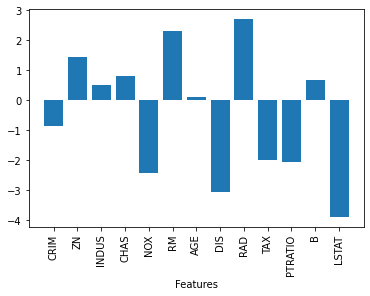

In [53]:
importance = model1.coef_
# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: %d, Score: %.5f" % (i, v))

# plot feature importance
plt.bar(df.columns[:-1], importance)  # Utilizamos df.columns[:-1] para excluir la última columna
plt.xlabel("Features")
plt.xticks(rotation=90)  # Giramos las etiquetas del eje x para mayor legibilidad
plt.show()

El resultado sugiere que tenemos una influencia con un patron poco claro, reforzado por un R2 de 0,76 que no mejora incrementando el nivel del polinomio. Lo que me hace pensar que debemos utilizar otro modelo.

3.1.2) utilicemos el modelo de Random Forest

Feature: 0, Score: 0.03903
Feature: 1, Score: 0.00095
Feature: 2, Score: 0.00865
Feature: 3, Score: 0.00102
Feature: 4, Score: 0.02516
Feature: 5, Score: 0.23145
Feature: 6, Score: 0.01776
Feature: 7, Score: 0.06894
Feature: 8, Score: 0.00436
Feature: 9, Score: 0.01315
Feature: 10, Score: 0.01769
Feature: 11, Score: 0.01468
Feature: 12, Score: 0.55716


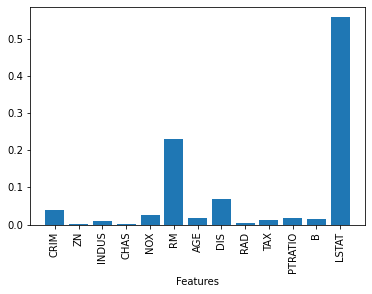

In [54]:
importance = model2.feature_importances_
for i,v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i,v))
    
# plot feature importance
plt.bar(df.columns[:-1], importance)  # Utilizamos df.columns[:-1] para excluir la última columna
plt.xlabel("Features")
plt.xticks(rotation=90)  # Giramos las etiquetas del eje x para mayor legibilidad
plt.show()

Vemos que nos da claramente una influencia notable de las variables RM, DIS y LSTAT, y algo menor de CRIM, NOX y AGE con un R2 de 0,86.

3.1.3) Utilicemos El Permutation Feature Importance con la regresión lineal y con el random forest (hace el analisis independientemente del modelo de regresión que hagamos)

a) con la regresion lineal (**aunque ya sabemos que nos va a dar algo poco concluyente proque el modelo no funciona bien**):

In [55]:
from sklearn.inspection import permutation_importance

In [56]:
result1 = permutation_importance(model1, X_test_scaled, y_test, n_repeats=30, random_state=0)

In [57]:
result1.importances_mean

array([0.02595989, 0.02597289, 0.00064565, 0.01086731, 0.12597758,
       0.16599248, 0.00060275, 0.2376161 , 0.14792044, 0.11004   ,
       0.11232613, 0.01831608, 0.37454714])

In [58]:
result1.importances_std

array([0.00698233, 0.00867539, 0.00391436, 0.00565698, 0.0219612 ,
       0.02429302, 0.00072234, 0.03079042, 0.0228165 , 0.01427665,
       0.02304626, 0.00521013, 0.04662494])

In [59]:
for i in range(len(result1.importances_mean)):
    print(f"Feature: {i}, {result1.importances_mean[i]:.3f} +/- {result1.importances_std[i]:.3f}")

Feature: 0, 0.026 +/- 0.007
Feature: 1, 0.026 +/- 0.009
Feature: 2, 0.001 +/- 0.004
Feature: 3, 0.011 +/- 0.006
Feature: 4, 0.126 +/- 0.022
Feature: 5, 0.166 +/- 0.024
Feature: 6, 0.001 +/- 0.001
Feature: 7, 0.238 +/- 0.031
Feature: 8, 0.148 +/- 0.023
Feature: 9, 0.110 +/- 0.014
Feature: 10, 0.112 +/- 0.023
Feature: 11, 0.018 +/- 0.005
Feature: 12, 0.375 +/- 0.047


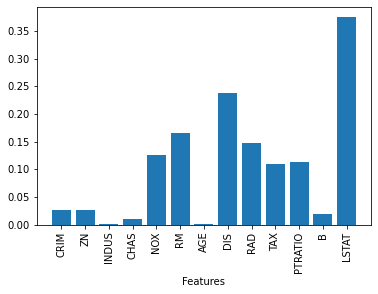

In [60]:
# plot feature importance
plt.bar(df.columns[:-1], result1.importances_mean)  # Utilizamos df.columns[:-1] para excluir la última columna
plt.xlabel("Features")
plt.xticks(rotation=90)  # Giramos las etiquetas del eje x para mayor legibilidad
plt.show()

b) con el Random Forest

In [61]:
from sklearn.inspection import permutation_importance
result2 = permutation_importance(model2, X_test_scaled, y_test, n_repeats=30, random_state=0)
for i in range(len(result2.importances_mean)):
    print(f"Feature: {i}, {result2.importances_mean[i]:.3f} +/- {result2.importances_std[i]:.3f}")

Feature: 0, 0.020 +/- 0.005
Feature: 1, 0.000 +/- 0.000
Feature: 2, 0.001 +/- 0.002
Feature: 3, 0.001 +/- 0.000
Feature: 4, 0.032 +/- 0.006
Feature: 5, 0.381 +/- 0.029
Feature: 6, 0.004 +/- 0.003
Feature: 7, 0.042 +/- 0.014
Feature: 8, 0.002 +/- 0.002
Feature: 9, 0.009 +/- 0.001
Feature: 10, 0.030 +/- 0.007
Feature: 11, 0.007 +/- 0.003
Feature: 12, 0.822 +/- 0.107


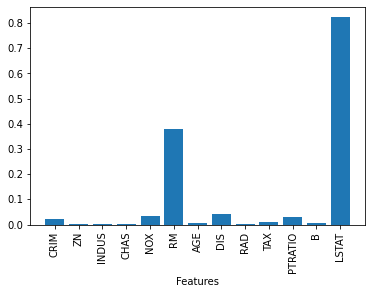

In [62]:
# plot feature importance
plt.bar(df.columns[:-1], result2.importances_mean)  # Utilizamos df.columns[:-1] para excluir la última columna
plt.xlabel("Features")
plt.xticks(rotation=90)  # Giramos las etiquetas del eje x para mayor legibilidad
plt.show()

Me confirma que RM, y LSTAT tienen mucha influencia comparativamente con el resto, y quizá tengamos overfitting en DIS y CRIM en el modelo.

c) Con el Gradient Boosting Trees Regresssor:

In [63]:
from sklearn.inspection import permutation_importance
result3 = permutation_importance(model3, X_test_scaled, y_test, n_repeats=30, random_state=0)
for i in range(len(result3.importances_mean)):
    print(f"Feature: {i}, {result3.importances_mean[i]:.3f} +/- {result3.importances_std[i]:.3f}")

Feature: 0, 0.008 +/- 0.002
Feature: 1, 0.000 +/- 0.000
Feature: 2, 0.000 +/- 0.001
Feature: 3, -0.000 +/- 0.001
Feature: 4, 0.032 +/- 0.005
Feature: 5, 0.381 +/- 0.029
Feature: 6, 0.006 +/- 0.004
Feature: 7, 0.099 +/- 0.027
Feature: 8, 0.005 +/- 0.002
Feature: 9, 0.018 +/- 0.003
Feature: 10, 0.063 +/- 0.013
Feature: 11, 0.010 +/- 0.005
Feature: 12, 0.536 +/- 0.072


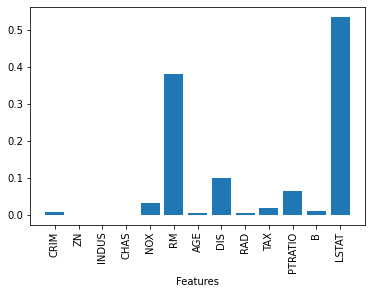

In [64]:
# plot feature importance
plt.bar(df.columns[:-1], result3.importances_mean)  # Utilizamos df.columns[:-1] para excluir la última columna
plt.xlabel("Features")
plt.xticks(rotation=90)  # Giramos las etiquetas del eje x para mayor legibilidad
plt.show()

Voy a  graficar los resultados en un boxplot del Random Forest y el Gradient Boosting Trees:

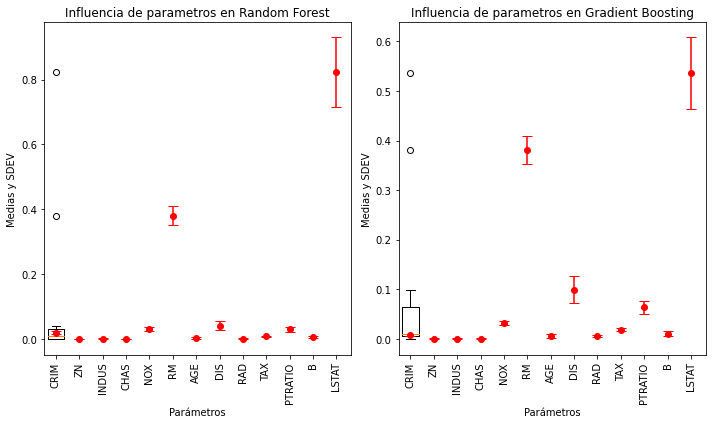

In [65]:
#Para simplificar renombro las medias y las sdev:
means1 = result2.importances_mean
sdev1 = result2.importances_std
means2 = result3.importances_mean
sdev2 = result3.importances_std

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Creo el gráfico de cajas con barras de error para means1
ax1.boxplot(means1, vert=True, widths=0.7)
ax1.errorbar(range(1, len(means1) + 1), means1, yerr=sdev1, fmt='o', color='red', capsize=5)
ax1.set_xlabel("Parámetros")
ax1.set_ylabel("Medias y SDEV")
ax1.set_xticks(range(1, len(df.columns[:-1]) + 1))
ax1.set_xticklabels(df.columns[:-1], rotation=90)
ax1.set_title("Influencia de parametros en Random Forest")


# Creo el gráfico de cajas con barras de error para means2
ax2.boxplot(means2, vert=True, widths=0.7)
ax2.errorbar(range(1, len(means2) + 1), means2, yerr=sdev2, fmt='o', color='red', capsize=5)
ax2.set_xlabel("Parámetros")
ax2.set_ylabel("Medias y SDEV")
ax2.set_xticks(range(1, len(df.columns[:-1]) + 1))
ax2.set_xticklabels(df.columns[:-1], rotation=90)
ax2.set_title("Influencia de parametros en Gradient Boosting")


plt.tight_layout()    # Ajusto los espacios entre subplots

plt.show()

Si hago entonces el modelo de regresión en gradient boosting con RM, DIS, PTRATIO y LSTAT veamos el error:

In [66]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [5, 7, 10, 12]]
X_test_scaled_infl = X_test_scaled[:, [5, 7, 10, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model31 = GradientBoostingRegressor().fit(X_train_scaled_infl, y_train)
y_pred31 = model31.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest21 = r2_score(y_test, y_pred31)
r2_forest21

0.8654062839089615

Si hago entonces el modelo de regresión con NOX, RM, DIS, PTRATIO y LSTAT veamos el error:

In [67]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [4, 5, 7, 10, 12]]
X_test_scaled_infl = X_test_scaled[:, [4, 5, 7, 10, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model32 = GradientBoostingRegressor().fit(X_train_scaled_infl, y_train)
y_pred32 = model32.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest22 = r2_score(y_test, y_pred32)
r2_forest22

0.8826284725935365

Si finalmente hago el modelo de regersión con NOX, RM, DIS, TAX, PTRATIO, B y LSTAT:

In [68]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
X_test_scaled_infl = X_test_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model33 = GradientBoostingRegressor().fit(X_train_scaled_infl, y_train)
y_pred33 = model33.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest23 = r2_score(y_test, y_pred33)
r2_forest23

0.8922581061918813

Eliminando las variables CRIM, ZN, INDUS, CHAS, AGE, y RAD obtengo un r2 mas elevado, y si las introduzco el resultado empeora.

### 3.2) Modifico hiperparámetros para mejorar el modelo:

**En el random Forest:**

3.2.1) Obtendré el **n_estimator** adecuado usando el Out-of-Bag error que me calcula el R2

Valor óptimo de n_estimators: 71


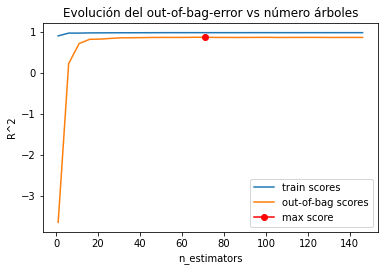

In [69]:
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    model4 = RandomForestRegressor(
                n_estimators = n_estimators,
                oob_score    = True,
                n_jobs       = -1,    # Para usar todos los cores del ordenador y reducir el tiempo de calculo
                random_state = 0)
    model4.fit(X_train_scaled, y_train)
    train_scores.append(model4.score(X_train_scaled, y_train))
    oob_scores.append(model4.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

3.2.2) Obtendré el **max_features** mas adecuado que me permite controlar cuanto se decorrelacionan los arboles entre si:  
 Seguiré usando el Out-of-Bag error que me calcula el R2

Valor óptimo de max_features: 13


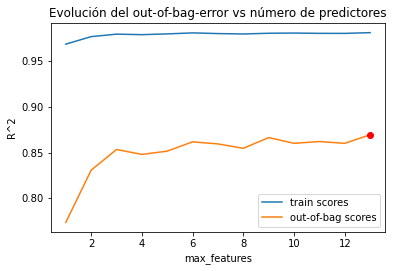

In [70]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train_scaled.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    model5 = RandomForestRegressor(
                n_estimators = 71,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 0)
    model5.fit(X_train_scaled, y_train)
    train_scores.append(model5.score(X_train_scaled, y_train))
    oob_scores.append(model5.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Es decir, si seguimos los resultados y aplicamos  n_estimators = 71, y max_features: 13 obtengo:

In [71]:
model6 = RandomForestRegressor( n_estimators = 71,
                max_features = 13,
                n_jobs       = -1,
                random_state = 0)
model6.fit(X_train_scaled, y_train)
y_pred6 = model6.predict(X_test_scaled)
from sklearn.metrics import r2_score
r2_forest6 = r2_score(y_test, y_pred6)
r2_forest6

0.8702301167357808

**En el Gradient Boosting Trees (número de árboles y learning rate):**

3.2.3) Modificaré el número de árboles del Gradient boosting Trees dado que es el hiperparámetro crítico en cuanto a la realción entre incremento de número de arboles y riesgo de overfitting.

Además, pirmero lo haré sin las features que he identificado como mas imporntates y despues ncluyendolas:

Valor óptimo de n_estimators: 376


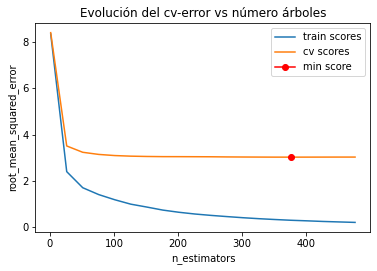

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import multiprocessing
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 500, 25)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    model7 = GradientBoostingRegressor(
                n_estimators = n_estimators,
                loss         = 'ls',
                max_features = 'auto',
                random_state = 0
             )
    
    # Error de train
    model7.fit(X_train_scaled, y_train)
    predicciones = model7.predict(X_train_scaled)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = model7,
                X         = X_train_scaled,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Obtengo:

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
model34 = GradientBoostingRegressor(n_estimators=376).fit(X_train_scaled, y_train)
y_pred34 = model34.predict(X_test_scaled)
from sklearn.metrics import r2_score
r2_forest24 = r2_score(y_test, y_pred34)
r2_forest24

0.8840271392775483

**Si uso las features que he detectado como las mas importantes:**

Valor óptimo de n_estimators: 151


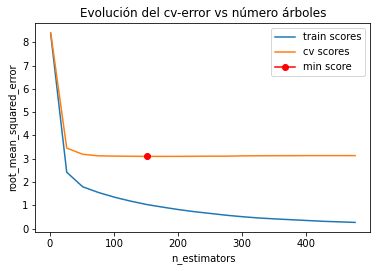

In [74]:
# Seleccionar las características más importantes
X_train_scaled_infl = X_train_scaled[:, [4, 5, 7, 9, 10, 11, 12]]

train_scores = []
cv_scores = []

estimator_range = range(1, 500, 25)

for n_estimators in estimator_range:
    model8 = GradientBoostingRegressor(
                n_estimators=n_estimators,
                loss='ls',
                max_features='auto',
                random_state=0
            )
    
    model8.fit(X_train_scaled_infl, y_train)
    predicciones = model8.predict(X_train_scaled_infl)
    rmse = mean_squared_error(y_true=y_train, y_pred=predicciones, squared=False)
    train_scores.append(rmse)
    
    scores = cross_val_score(
                estimator=model8,
                X=X_train_scaled_infl,
                y=y_train,
                scoring='neg_root_mean_squared_error',
                cv=5,
                n_jobs=multiprocessing.cpu_count() - 1,
            )
    cv_scores.append(-1 * scores.mean())

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color="red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend()
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Obtengo:

In [75]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
X_test_scaled_infl = X_test_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model35 = GradientBoostingRegressor(n_estimators=151).fit(X_train_scaled_infl, y_train)
y_pred35 = model35.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest25 = r2_score(y_test, y_pred35)
r2_forest25

0.8886490924046894

3.2.4) EL learning rate es otro hiperparametro imporntante en Gradient Boosting, dado que me permite controlar cómo de rápido aprende el modelo y por tanto el riesgo de tener overfitting.  
El Learning rate es invesamente proporcional al número de árboles, es decir, cuanto menro es cuanto menor es el learning rate, más árboles se necesitan para alcanzar buenos resultados pero menor es el riesgo de overfitting.   
Hagamos pues validción cruzada:

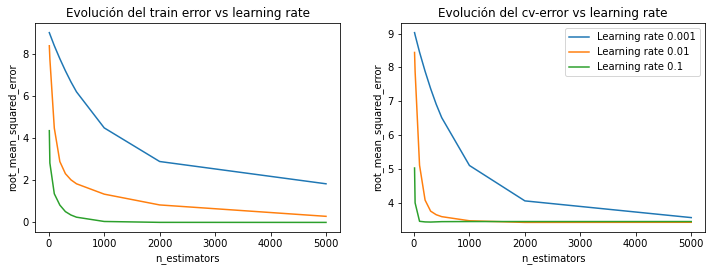

In [76]:
X_train_scaled_infl = X_train_scaled[:, [4, 5, 7, 9, 10, 11, 12]]

# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
resultados = {}

# Valores evaluados
learning_rates = [0.001, 0.01, 0.1]
n_estimators   = [10, 20, 100, 200, 300, 400, 500, 1000, 2000, 5000]


# Bucle para entrenar un modelo con cada combinacion de  learning_rate y n_estimator 
# y extraer su error de entrenamiento y k-cross-validation.
for learning_rate in learning_rates:
    train_scores = []
    cv_scores    = []
    
    for n_estimator in n_estimators:
    
        model9 = GradientBoostingRegressor(
                    n_estimators  = n_estimator,
                    learning_rate = learning_rate,
                    loss          = 'ls',
                    max_features  = 'auto',
                    random_state  = 0
                 )

        # Error de train
        model9.fit(X_train_scaled_infl, y_train)
        predicciones = model9.predict(X_train_scaled_infl)
        rmse = mean_squared_error(
                y_true  = y_train,
                y_pred  = predicciones,
                squared = False
               )
        train_scores.append(rmse)

        # Error de validación cruzada
        scores = cross_val_score(
                    estimator = model9,
                    X         = X_train_scaled_infl,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 3,
                    n_jobs    = multiprocessing.cpu_count() - 1
                 )
        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())
        
    resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}

# Gráfico con la evolución de los errores de entrenamiento
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.84))

for key, value in resultados.items():
    axs[0].plot(n_estimators, value['train_scores'], label=f"Learning rate {key}")
    axs[0].set_ylabel("root_mean_squared_error")
    axs[0].set_xlabel("n_estimators")
    axs[0].set_title("Evolución del train error vs learning rate")
    
    axs[1].plot(n_estimators, value['cv_scores'], label=f"Learning rate {key}")
    axs[1].set_ylabel("root_mean_squared_error")
    axs[1].set_xlabel("n_estimators")
    axs[1].set_title("Evolución del cv-error vs learning rate")
    plt.legend();

Observamos que el valor mejor de Learning rate es 0,1.

In [77]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
X_test_scaled_infl = X_test_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model36 = GradientBoostingRegressor(n_estimators=151,learning_rate=0.1).fit(X_train_scaled_infl, y_train)
y_pred36 = model36.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest26 = r2_score(y_test, y_pred36)
r2_forest26

0.8904334076741375

3.2.5) Ahora verificamos el hiperparámetro Max depth en el modelo Gradient Boosting (suele ser un valor muy bajo) 

Valor óptimo de max_depth: 3


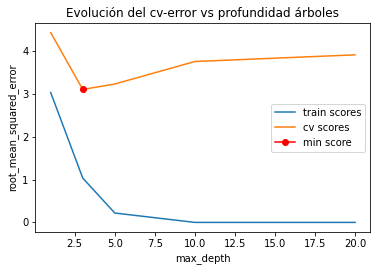

In [78]:
X_train_scaled_infl = X_train_scaled[:, [4, 5, 7, 9, 10, 11, 12]]

# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_depths = [1, 3, 5, 10, 20]

# Bucle para entrenar un modelo con cada valor de max_depth y extraer su error
# de entrenamiento y de k-cross-validation.
for max_depth in max_depths:
    
    model10 = GradientBoostingRegressor(
                n_estimators = 151,
                learning_rate = 0.1,       
                loss         = 'ls',
                max_depth    = max_depth,
                max_features = 'auto',
                random_state = 0
             )
    
    # Error de train
    model10.fit(X_train_scaled_infl, y_train)
    predicciones = model10.predict(X_train_scaled_infl)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = model10,
                X         = X_train_scaled_infl,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_depths, train_scores, label="train scores")
ax.plot(max_depths, cv_scores, label="cv scores")
ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_depth")
ax.set_title("Evolución del cv-error vs profundidad árboles")
plt.legend();
print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")

Observamos que el mejor valor de max depth es 3.

In [79]:
import numpy as np    #creo un array de las columnas que voy a utilizar
X_train_scaled_infl = X_train_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
X_test_scaled_infl = X_test_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
from sklearn.ensemble import GradientBoostingRegressor
model37 = GradientBoostingRegressor(n_estimators=151,learning_rate=0.1, max_depth=3).fit(X_train_scaled_infl, y_train)
y_pred37 = model36.predict(X_test_scaled_infl)
from sklearn.metrics import r2_score
r2_forest7 = r2_score(y_test, y_pred37)
r2_forest7

0.8904334076741375

**Pero el análisis individual de los hiperparámetros no me asegura que el resultado combinado sea el optimo proque cada uno interacciona con los otros.**  

Cuando los recursos computacionales (o tiempo) son limitados, es aconsejable seguir una de las siguientes estrategias para identificar los hiperparámetros óptimos de un modelo Gradient Boosting:

* Fijar el número de árboles y optimizar el learning rate.

* Fijar el learning rate y añadir tantos árboles como sea necesario pero activando la parada temprana para evitar overfitting.

Una vez identificados los valores de estos hiperparámetros, se refinan el resto.

Para ello debo usar Grid search o Random Search:

### 3.3) Uso el metodo grid search para evaluar la mejor combinación de parámetros:

**En el RandomForest**


3.3.1) Grid Search basado en out-of-bag-error aplicado al RandomForest:

In [89]:

from sklearn.model_selection import ParameterGrid

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9, 13],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    model20 = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 0,
                ** params
             )
    
    model20.fit(X_train_scaled, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(model20.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 13, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features':

,oob_r2,max_depth,max_features,n_estimators
15,0.865155,20.0,13.0,150.0
3,0.865076,NaN,13.0,150.0
11,0.863772,10.0,13.0,150.0
2,0.860553,NaN,9.0,150.0


In [81]:
model21 = RandomForestRegressor( n_estimators = 150,
                max_features = 13,
                max_depth    = 20,
                n_jobs       = -1,
                random_state = 0)
model21.fit(X_train_scaled, y_train)
y_pred21 = model21.predict(X_test_scaled)
from sklearn.metrics import r2_score
r2_forest7 = r2_score(y_test, y_pred21)
r2_forest7

0.8688910537068565

3.3.2) Grid Search basado en validación cruzada:

In [82]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import RepeatedKFold
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 9, 13],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 0),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X_train_scaled, y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
2,None,13,150,-3.562665,0.694907,-1.342358,0.063501
11,20,13,150,-3.563158,0.694850,-1.342233,0.063518
8,10,13,150,-3.567957,0.703706,-1.382685,0.060746
7,10,9,150,-3.618223,0.743827,-1.384935,0.051692


**En el Gradient Boosting:**

3.3.3) Grid search basado en validación curzada- No incluimos el número de arboles como hiperparámetro en el grid y en su lugar utilizamos un numero elevado y activamos la parada temprana-

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(
                        n_estimators        = 1000, 
                        random_state        = 0,
                        # Activación de la parada temprana
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=0), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X_train_scaled, y_train)

# Resultados
# ==============================================================================
print(f"Número de árboles del modelo: {grid.best_estimator_.n_estimators_}")
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


Número de árboles del modelo: 42


,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
84,0.1,3,auto,0.5,-3.516773,0.135336,-2.136913,0.371262
106,0.1,20,log2,0.5,-3.618895,0.311911,-1.427429,0.273562
104,0.1,20,sqrt,0.5,-3.618895,0.311911,-1.427429,0.273562
76,0.1,None,log2,0.5,-3.684708,0.425449,-1.450633,0.258574


Identificados los mejore shiperparámetros, reetrenamos el modelo indicando los valores óptimos.  
Como en el **GridSearchCV** hemos indicado **refit=True**, el reentrenamiento se ha hecho automáticamente y está almancenado en **.best_estimator_**:

In [116]:
X_train_scaled_infl = X_train_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
X_test_scaled_infl = X_test_scaled[:, [ 4, 5, 7, 9, 10, 11, 12]]
modelfin = grid.best_estimator_
y_predfind = modelfin.predict(X_test_scaled)
from sklearn.metrics import r2_score
r2_forestfin = r2_score(y_test, y_predfind)
r2_forestfin

0.8742542123926382

**Laia, me gustaría comentar contigo por qué me da un valor peor que el que he llegado por separado**

# Exercici 4
## Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

COmpararé el rendimiento del analisis RainForestRegressor 

# Exercici 5
## No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.